In [1]:
print('Loading modules....')

import os, sys


import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import ROOT as rt
import seaborn as sns
import operator as op
import pandas as pd
from collections import Counter

print('modules loaded...')

Loading modules....


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
/usr/local/lib/python3.8/dist-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


Welcome to JupyROOT 6.24/06
modules loaded...


In [2]:
series = ['07240206_1832']
event_numbers = [12000, 12001, 12012, 12013, 12018, 12019, 12026, 12027, 12030, 12031]


# series = ['23231219_110331']
# event_numbers = [50753, 331819, 361818, 364268, 371744, 383033, 421283]
series = ['07240206_1402']
event_numbers = [2300002, 2300003, 2300004, 2300006, 2300007, 2300010, 2300011, 2300012, 2300013, 2300015]
det = 'Z1'
detNum = int(det[-1])

In [3]:
#base = '/data/chocula/pandey/common_data/R79'
base = '/data/chocula/pandey/data_processing/from_neog/rq'

#series = ['07240205_1718','07240206_1832']
#series = ['07240206_1832']
series=['07240206_1402']
filePath = []

for ser in series:
    
    fp = '%s/%s/umn_%s.root'%(base,ser,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
    else:
        print('not found: ',fp)

print('Loading OF spefic data....')
dets = ['Z1']
zips = {
    'Z1' : 'zip1',
    'Z2' : 'zip2',
    'Z3' : 'zip3',
    'Z4' : 'zip4',
    'Z5' : 'zip5',
    'Z6' : 'zip6'
}
RQ = []

for idx,key in enumerate(series):
    t = {}
    for i,det in enumerate(dets):
        t[det] = uproot.open(filePath[idx])['rqDir/%s'%(zips[det])]
    RQ.append(t)

eventTree=[]
for idx,key in enumerate(series):
    eventTree.append(uproot.open(filePath[idx])['rqDir/eventTree']) 

channels = ['PA','PB','PC','PD','PE','PF']
quantity = ['OFamps','OFamps0' ,'INTall','OFchisq','bs','WKf40','WKr40','WKr20']

#series=['23231024_231640']
OFamps={}
OFamps0={}
OFchiq={}
OFINTall={}
OFbs={}
OFdelay={}
WKf40={}
WKr40={}
WKr20={}

for i,key in enumerate(series): # for each series
    ta={}
    ta0={}
    tc={}
    tint={}
    tbs={}
    td={}
    twf40={}
    twr40={}
    twr20={}
    for j,det in enumerate(dets):     # for each detector
        tta={}
        tta0={}
        ttc={}
        ttint={}
        ttbs={}
        ttd={}
        ttwf40={}
        ttwr40={}
        ttwr20={}
        
        print('Detector = ',det)
        for c in channels:                # for each channel
            
#             if(det == 'Z3' and c == 'PAS1'):
#                 print('\tSkipping Z3-PAS1...')
#                 continue
            #print('\t chan = ',c)
            tta[c]=(RQ[i][det][c+"OFamps"].array(library='np'))
            
            tta0[c]=(RQ[i][det][c+"OFamps0"].array(library='np'))
            ttc[c]=(RQ[i][det][c+"OFchisq"].array(library='np'))
            ttint[c]=(RQ[i][det][c+"INTall"].array(library='np'))
            ttd[c]=(RQ[i][det][c+"OFdelay"].array(library='np'))
            ttwf40[c]=(RQ[i][det][c+"WKf40"].array(library='np'))
            ttwr40[c]=(RQ[i][det][c+"WKr40"].array(library='np'))
            ttwr20[c]=(RQ[i][det][c+"WKr20"].array(library='np'))
            
#             tta[c]=(RQ[i][det].array(c+"OFamps"))
#             tta0[c]=(RQ[i][det].array(c+"OFamps0"))
#             ttc[c]=(RQ[i][det].array(c+"OFchisq"))
#             ttint[c]=(RQ[i][det].array(c+"INTall"))
#             ttd[c]=(RQ[i][det].array(c+"OFdelay"))
#             ttwf40[c]=(RQ[i][det].array(c+"WKf40"))
#             ttwr40[c]=(RQ[i][det].array(c+"WKr40"))
#             ttwr20[c]=(RQ[i][det].array(c+"WKr20"))           
            if(c!='PT'):
                #ttbs[c]=(RQ[i][det].array(c+"bs"))
                ttbs[c]=(RQ[i][det][c+"bs"].array(library='np'))
        
        ta[det] = tta
        ta0[det] = tta0
        tc[det] = ttc
        tint[det] = ttint
        td[det] = ttd
        twf40[det] = ttwf40
        twr40[det] = ttwr40
        twr20[det] = ttwr20
        tbs[det] = ttbs
    
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFchiq[key]=tc
    OFINTall[key]=tint
    OFdelay[key]=td
    OFbs[key]=tbs
    WKf40[key]=twf40
    WKr40[key]=twr40
    WKr20[key]=twr20
    
        
    print('Done for %s..'%(key))


print(' Loading Event specific data....')


# Get event info from processed files
#eventTree = ['EventCategory','EventTime','EventNumber','EventType']
EventNumber=[]
EventCategory=[]
EventTime=[]
EventType=[]
# TriggerTime=[]
# TriggerType=[]
# TrigDet=[]

for i,key in enumerate(series):
    EventNumber.append(eventTree[i]['EventNumber'].array(library='np'))
    EventCategory.append(eventTree[i]['EventCategory'].array(library='np'))
    EventTime.append(eventTree[i]['EventTime'].array(library='np'))
    EventType.append(eventTree[i]['EventType'].array(library='np'))
    
#     TriggerTime.append(eventTree[i]['TriggerTime'].array(library='np'))
#     TriggerType.append(eventTree[i]['TriggerType'].array(library='np'))
    
#     TrigDet.append(eventTree[i]['TrigDet'].array(library='np'))
    
    print('%s loaded'%(key))
print('Done!')


07240206_1402  :  /data/chocula/pandey/data_processing/from_neog/rq/07240206_1402/umn_07240206_1402.root
Loading OF spefic data....
Detector =  Z1
Done for 07240206_1402..
 Loading Event specific data....
07240206_1402 loaded
Done!


In [4]:
'''
    Load  OFamps, baseline, and delay for specific events
'''

proc_of = {}
proc_bs = {}
proc_delay = {}

for idx, key in enumerate(series):
    t_of = []
    t_bs = []
    t_delay = []
    for enum in event_numbers:
        tt_of = {}
        tt_bs = {}
        tt_delay = {}
        for c in channels:
            if(c != 'PT'):
                tt_bs[c] = ((OFbs[key][det][c][EventNumber[idx] == enum]))
            tt_of[c] = ((OFamps[key][det][c][EventNumber[idx] == enum]))
            
            tt_delay[c] = ((OFdelay[key][det][c][EventNumber[idx] == enum]))
        t_of.append(tt_of)
        t_bs.append(tt_bs)
        t_delay.append(tt_delay)
    proc_of[key] = t_of
    proc_bs[key] = t_bs
    proc_delay[key] = t_delay
print('done')

done


In [5]:
OFbs[key].keys()

dict_keys(['Z1'])

In [6]:
Rshunt = 5.0e-3 # shunt resistance
Rfb = 5000.0 # feedback resistance
ADCperVolt = 65536.0/8.0 # the number of ADC bins per V for the readout
LoopRatio = 2.4 # SQUID turn ratio 
low_pass_filter = False
high_cutoff, fs, order = 100000, 625000, 2
trace_length = 1.6 # uS
bins = 32768
rawfilepath='/data/chocula/fritts/data/k100proc/midasraw/byseries/'



In [7]:
#Load detector settings
dsettings={}
for idx,key in enumerate(series):
    dsettings[key]=cdms.rawio.IO.getDetectorSettings(rawfilepath,key)

INFO: Found 240 midas raw data files
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries//07240206_1402/07240206_1402_F0240.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries//07240206_1402/07240206_1402_F0240.mid.gz


RawDataReader::ERROR Failed to read DetectorConfig info from midas file, as ODB path Path not found in ODB dump: /Detectors was not found. Continuing anyway.


In [8]:
raw_data = {}
det = 'Z1'
for idx, key in enumerate(series):
    c = 'PT'
    t_rd = {}
    
    for c in channels:
        fname = './rawdata/%s_%s_%s.pkl'%(key,det,c)
        if(c=='PT'):
            continue
        #event_number[c] = EventNumber[idx][cut][:10]
        if(det == 'Z3' and c == 'PAS1'):
            continue
        if os.path.exists(fname):
            t_rd[c] = pkl.load(open(fname, "rb"))
            print('pkl file loaded for %s'%(c))
        else:
            print('No pickle file available. Loading traces... ')
            
            t_rd[c] = cdms.rawio.IO.getRawEvents(rawfilepath,'/'+key,outputFormat = 2, eventNumbers=event_numbers, 
                                                   channelList=[c], detectorList=[detNum])
            pkl.dump(t_rd[c], open(fname, "wb"))
            
            print('pkl file loaded for %s'%(c))
    raw_data[key] = t_rd
    print('Raw traces [ADC] loaded...')
    

print('all done')

No pickle file available. Loading traces... 


/tmp/ipykernel_198822/3373014060.py:22: ResourceWarning: unclosed file <_io.BufferedWriter name='./rawdata/07240206_1402_Z1_PA.pkl'>
  pkl.dump(t_rd[c], open(fname, "wb"))


pkl file loaded for PA
No pickle file available. Loading traces... 


/tmp/ipykernel_198822/3373014060.py:22: ResourceWarning: unclosed file <_io.BufferedWriter name='./rawdata/07240206_1402_Z1_PB.pkl'>
  pkl.dump(t_rd[c], open(fname, "wb"))


pkl file loaded for PB
No pickle file available. Loading traces... 


/tmp/ipykernel_198822/3373014060.py:22: ResourceWarning: unclosed file <_io.BufferedWriter name='./rawdata/07240206_1402_Z1_PC.pkl'>
  pkl.dump(t_rd[c], open(fname, "wb"))


pkl file loaded for PC
No pickle file available. Loading traces... 


/tmp/ipykernel_198822/3373014060.py:22: ResourceWarning: unclosed file <_io.BufferedWriter name='./rawdata/07240206_1402_Z1_PD.pkl'>
  pkl.dump(t_rd[c], open(fname, "wb"))


pkl file loaded for PD
No pickle file available. Loading traces... 


/tmp/ipykernel_198822/3373014060.py:22: ResourceWarning: unclosed file <_io.BufferedWriter name='./rawdata/07240206_1402_Z1_PE.pkl'>
  pkl.dump(t_rd[c], open(fname, "wb"))


pkl file loaded for PE
No pickle file available. Loading traces... 
pkl file loaded for PF
Raw traces [ADC] loaded...
all done
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries///07240206_1402/07240206_1402_F0230.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries///07240206_1402/07240206_1402_F0230.mid.gz
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries///07240206_1402/07240206_1402_F0230.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries///07240206_1402/07240206_1402_F0230.mid.gz
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries///07240206_1402/07240206_1402_F0230.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries///07240206_1402/07240206_1402_F0230.mid.gz
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries///07240206_1402/07240206_1402_F0230.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries/

/tmp/ipykernel_198822/3373014060.py:22: ResourceWarning: unclosed file <_io.BufferedWriter name='./rawdata/07240206_1402_Z1_PF.pkl'>
  pkl.dump(t_rd[c], open(fname, "wb"))


In [9]:
'''
    Low pass filter
'''

import scipy.optimize as optimize
from scipy.signal import firwin, lfilter
def low_pass_filter(signal, cutoff_frequency, sampling_rate, filter_order=100):
    # Calculate the Nyquist frequency
    nyquist_frequency = 0.5 * sampling_rate

    # Normalize the cutoff frequency
    normalized_cutoff = cutoff_frequency / nyquist_frequency

    # Design a low-pass FIR filter
    filter_coefficients = firwin(filter_order, normalized_cutoff, window='hamming')

    # Apply the filter to the signal using lfilter
    filtered_signal = lfilter(filter_coefficients, 1.0, signal)

    return filtered_signal


In [10]:
'''
    Cosmetics
'''

color_p = {
    'PA' : 'red',
    'PB' : 'orange',
    'PC' : 'brown',
    'PD' : 'blue',
    'PE' : 'cyan',
    'PF' : 'green',
    'PT'   : 'black'
    
}
style_p = {
    'PA' : '-',
    'PB' : '-',
    'PC' : '-',
    'PD' : '-',
    'PE' : '-',
    'PF' : '-',
    'PT'   : '-'
}
# cycler = plt.cycler(linestyle=['-', '-', '-', '-', '-', '-', '--','--','--','--','--','--'],
#                     color=['maroon', 'orange', 'yellow', 'black', 'blue', 'green', 'maroon', 'orange', 'yellow', 'black', 'blue', 'green'],
# )

In [11]:
(raw_data[key]['PF'][1]['event']['EventNumber'])

2300003

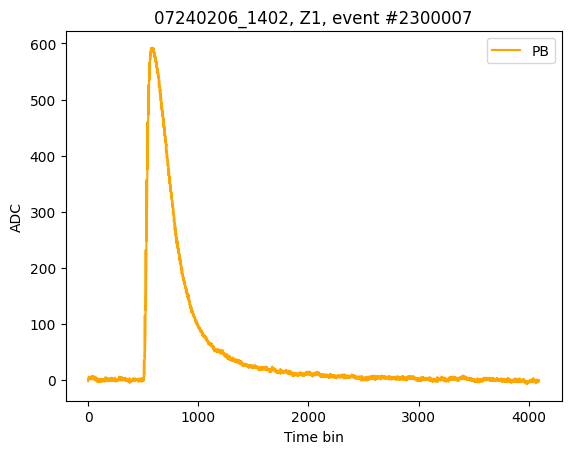

In [18]:
idx = 4
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PB'
trace = raw_data[key][c][idx][det][c]
trace_median = np.median(trace[10:500])
bs_corrected = trace-trace_median
#lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
lp_filtered = (bs_corrected)

plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

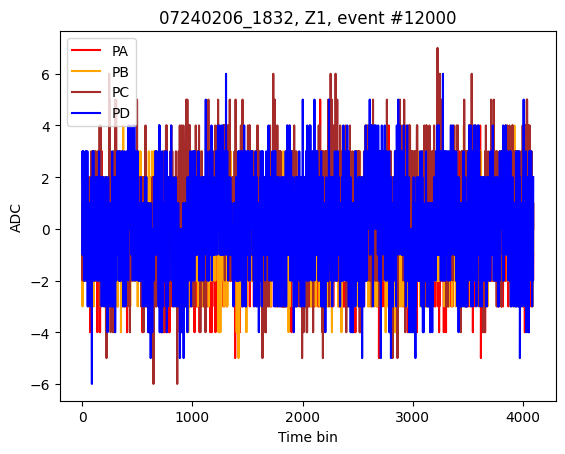

In [50]:
idx = 0
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

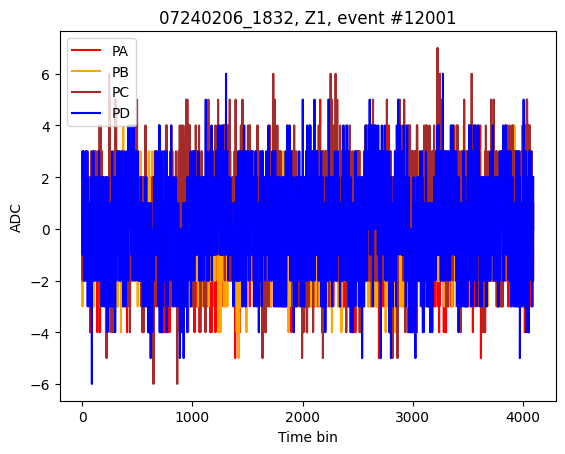

In [51]:
idx = 1
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

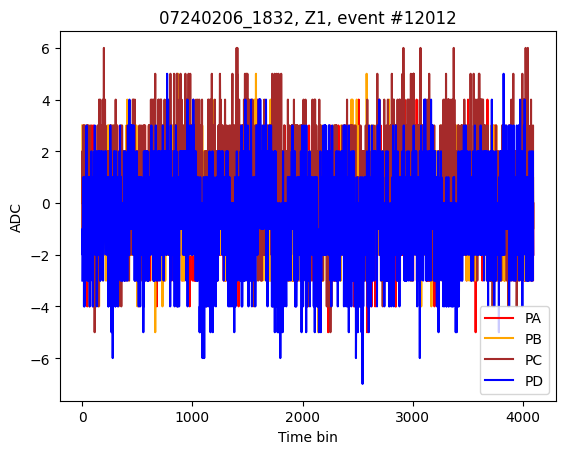

In [52]:
idx = 2
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

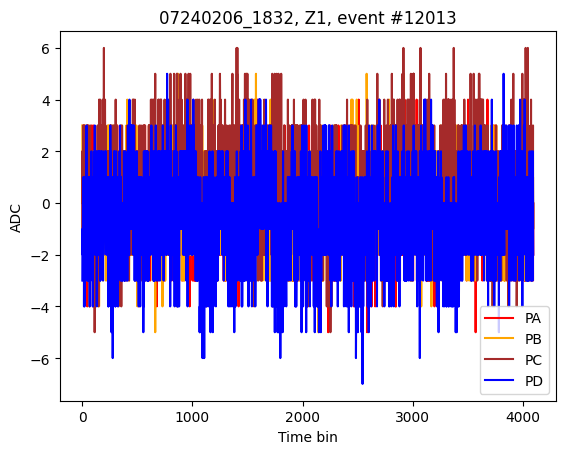

In [53]:
idx = 3
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

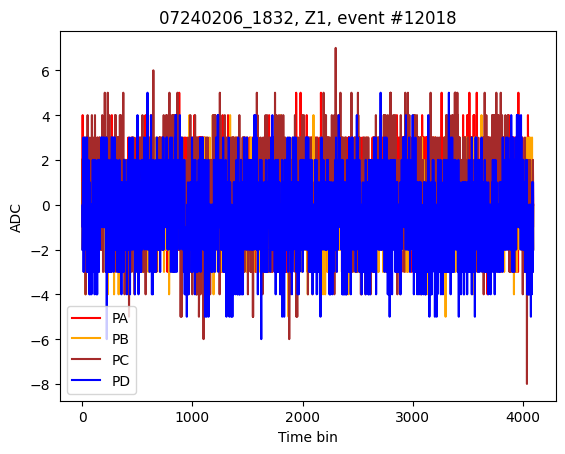

In [54]:
idx = 4
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

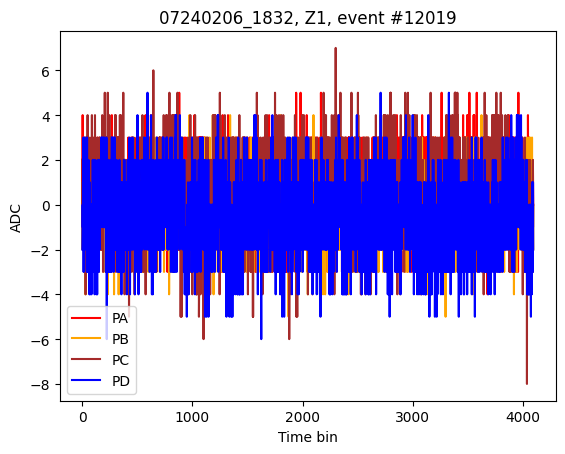

In [55]:
idx = 5
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

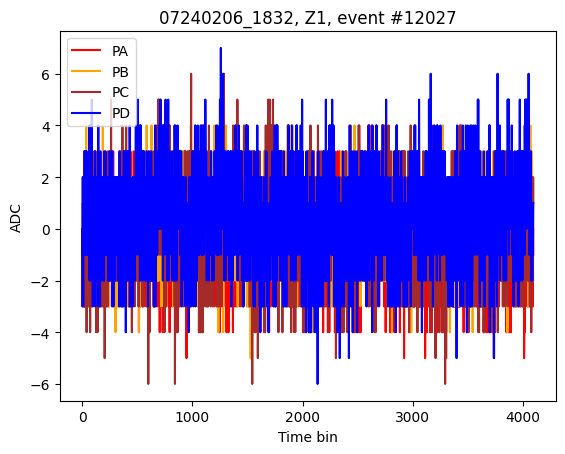

In [56]:
idx = 7
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()

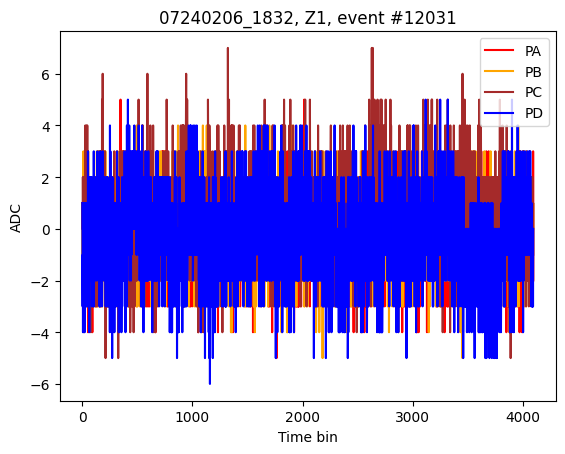

In [57]:
idx = 9
key = series[0]
high_cutoff, fs, order = 1000, 625000, 10
det = 'Z1'
plt.figure()
c = 'PD'
for c in channels:
    if(c=='PE' or c == 'PF'):
        continue
    trace = raw_data[key][c][idx][det][c]
    trace_median = np.median(trace[10:500])
    bs_corrected = trace-trace_median
    #lp_filtered = low_pass_filter(bs_corrected,high_cutoff,fs,order)
    lp_filtered = (bs_corrected)

    plt.plot((lp_filtered),label=c,color=color_p[c],linestyle=style_p[c])
    plt.title(key+', '+det+', event #%d'%(raw_data[key]['PB'][idx]['event']['EventNumber']))

plt.legend()
#plt.xlim(15500,17000)
#plt.xlim(15000,18000)
plt.ylabel('ADC')
plt.xlabel('Time bin')
#plt.ylim(-0.02,0.14)
plt.show()